In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# SELLER P&L ANALYSIS

🎯 The goal of this exercise is to compute the P&L associated to each seller  

For each `seller_id` we need three items:  

- The **revenue**:
 - 10% fee on sales
 - 80 BRL per month on Olist


- The **cost**:
 - Review cost according to `{1: 100, 2: 50, 3: 40, 4: 0, 5: 0}` with review score as key and cost in BRL as value


- The **profit** made by Olist

💡 Let's not start from scratch  
❓ Import your seller training set and investigate what you already have.


In [2]:
from olist.seller import Seller
seller = Seller().get_training_data()

In [4]:
print(seller.shape)
seller.head()

(2967, 15)


,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_stars,share_of_one_stars
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,3.000000,1,1
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,4.560976,30,2
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,5.000000,1,0
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,5.000000,1,0
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0,1


In [8]:
seller['revenue'] = seller['months_on_olist'] * 80 + seller['sales']*0.1 

In [9]:
seller.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_stars,share_of_one_stars,revenue
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,3.000000,1,1,341.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,4.560976,30,2,2290.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,5.000000,1,0,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,5.000000,1,0,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0,1,16.799


In [11]:
from olist.data import Olist
data = Olist().get_data()

In [43]:
type(data)

dict

In [44]:
data.keys()

dict_keys(['sellers', 'order_reviews', 'order_items', 'customers', 'orders', 'order_payments', 'product_category_name_translation', 'products', 'geolocation'])

In [49]:
orders = data['order_items'][['order_id', 'seller_id']]
orders.head()

,order_id,seller_id
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87


In [50]:
reviews = data['order_reviews'][['order_id', 'review_score']]
reviews.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


In [55]:
merged_df = orders.merge(reviews, on='order_id')
merged_df.head()

,order_id,seller_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,5
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,4
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,5
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,5


In [56]:
merged_df.drop(columns='order_id', inplace=True)
merged_df.head()

,seller_id,review_score
0,48436dade18ac8b2bce089ec2a041202,5
1,dd7ddc04e1b6c2c614352b383efe2d36,4
2,5b51032eddd242adc84c38acab88f23d,5
3,9d7a1d34a5052409006425275ba1c2b4,4
4,df560393f3a51e74553ab94004ba5c87,5


In [57]:
merged_df['review_score'].map({1: 100, 2: 50, 3: 40, 4: 0, 5: 0})

0         0
1         0
2         0
3         0
4         0
         ..
112367    0
112368    0
112369    0
112370    0
112371    0
Name: review_score, Length: 112372, dtype: int64

In [15]:
df = data['order_items'][['order_id', 'seller_id']].merge(data['order_reviews'][['order_id', 'review_score']],
                                                          on='order_id').drop(columns='order_id')

In [22]:
df['cost'] = df['review_score'].map({1: 100, 2: 50, 3: 40, 4: 0, 5: 0})

In [24]:
df.sample(10)

,seller_id,review_score,cost
7725,850f4f8af5ea87287ac68de36e29107f,5,0
21897,2e1c9f22be269ef4643f826c9e650a52,5,0
14545,38102b031c2a15e54623d711bfc753d3,3,40
46235,ff69aa92bb6b1bf9b8b7a51c2ed9cf8b,5,0
80057,33a6f4b1e7cdc205511e76ba1b6e0186,5,0
28348,0be8ff43f22e456b4e0371b2245e4d01,1,100
74698,f8db351d8c4c4c22c6835c19a46f01b0,5,0
92934,3d871de0142ce09b7081e2b9d1733cb1,5,0
6904,7e93a43ef30c4f03f38b393420bc753a,4,0
45601,f457c46070d02cadd8a68551231220dd,5,0


In [25]:
df.groupby('seller_id').sum()

,review_score,cost
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,11,100
001cca7ae9ae17fb1caed9dfb1094831,921,4750
001e6ad469a905060d959994f1b41e4f,1,100
002100f778ceb8431b7a1020ff7ab48f,223,1110
003554e2dce176b5555353e4f3555ac8,5,0
...,...,...
ffcfefa19b08742c5d315f2791395ee5,1,100
ffdd9f82b9a447f6f8d4b91554cc7dd3,85,240
ffeee66ac5d5a62fe688b9d26f83f534,59,200


In [26]:
Seller().get_review_score()

,seller_id,review_score,share_of_five_stars,share_of_one_stars,cost
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667,2,1,100
1,001cca7ae9ae17fb1caed9dfb1094831,3.902542,121,34,4750
2,001e6ad469a905060d959994f1b41e4f,1.000000,0,1,100
3,002100f778ceb8431b7a1020ff7ab48f,3.982143,31,7,1110
4,003554e2dce176b5555353e4f3555ac8,5.000000,1,0,0
...,...,...,...,...,...
3085,ffcfefa19b08742c5d315f2791395ee5,1.000000,0,1,100
3086,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000,13,1,240
3087,ffeee66ac5d5a62fe688b9d26f83f534,4.214286,9,2,200
3088,fffd5413c0700ac820c7069d66d98c89,3.866667,33,11,1360


❓ What is missing?  
Write down a strategy to get your missing columns  
Re-use as much of what has already been coded in `seller.py` as possible

In [ ]:
# Your pseudo-code

❓ Make a copy of `seller.py`, rename it `seller_updated.py` and update it accordingly

> YOUR ANSWER HERE

❓ Compute seller profits

> YOUR ANSWER HERE

❓ Load your updated DataFrame

In [27]:
seller_updated = Seller().get_training_data()

In [28]:
seller_updated.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_stars,share_of_one_stars,cost,revenue,profit
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000,218.70,3.000000,1,1,140,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025,11703.07,4.560976,30,2,240,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000,158.00,5.000000,1,0,0,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000,79.99,5.000000,1,0,0,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000,167.99,1.000000,0,1,100,16.799,-83.201


❓ Sort sellers by profit, and analyse their profitability: conclude on a possible strategy for Olist!

In [33]:
seller_sorted = seller_updated[['seller_id', 'profit']].sort_values('profit').reset_index()
seller_sorted

,index,seller_id,profit
0,769,6560211a19b47992c3666cc44a7e94c0,-26349.517
1,453,1f50f920176fa81dab994f9023523100,-25436.079
2,1132,7c67e1448b00f6e969d365cea6b010ab,-24057.611
3,2358,4a3ca9315b744ce9f8e9374361493884,-22972.708
4,1357,cc419e0650a3c5ba77189a1882b7556a,-19121.158
...,...,...,...
2962,9,ccc4bbb5f32a6ab2b7066a4130f114e3,6620.462
2963,2151,edb1ef5e36e0c8cd84eb3c9b003e486d,7238.455
2964,67,7e93a43ef30c4f03f38b393420bc753a,14483.187
2965,534,fa1c13f2614d7b5c4749cbc52fecda94,14494.203


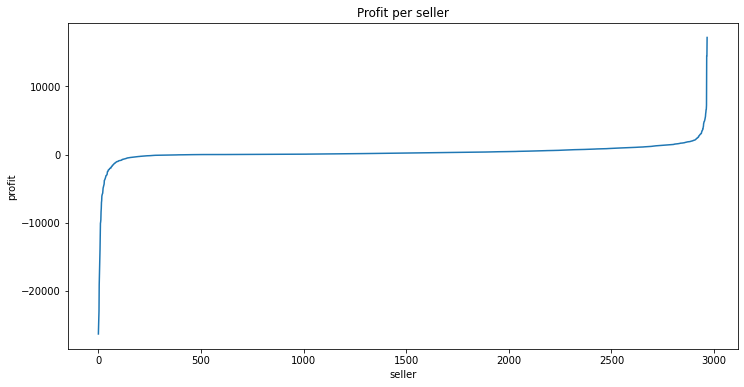

In [37]:
plt.figure(figsize=(12,6))
seller_sorted.profit.plot()
plt.title('Profit per seller')
plt.xlabel('seller')
plt.ylabel('profit');

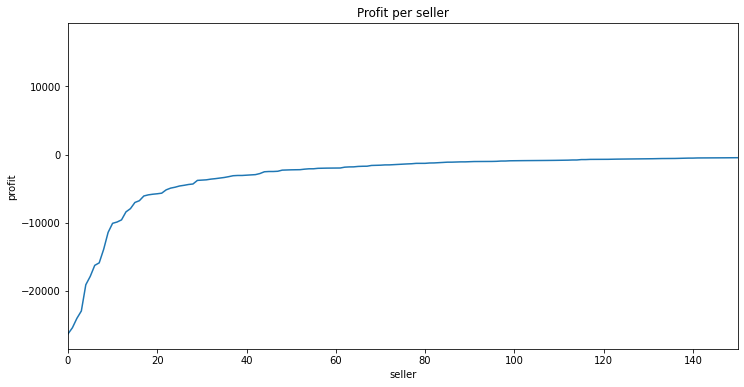

In [39]:
plt.figure(figsize=(12,6))
seller_sorted.profit.plot()
plt.title('Profit per seller')
plt.xlabel('seller')
plt.ylabel('profit')
plt.xlim(0,150);

In [41]:
from olist.seller import Seller
Seller().get_training_data()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,review_score,share_of_five_stars,share_of_one_stars,cost,revenue,profit
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,3.000000,1,1,140,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,4.560976,30,2,240,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,5.000000,1,0,0,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,5.000000,1,0,0,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,1.000000,0,1,100,16.799,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,2,2,1.000000,158.00,5.000000,2,0,0,15.800,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,10,10,1.000000,889.00,4.100000,5,1,140,1208.900,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,6,7,1.166667,550.04,5.000000,7,0,0,455.004,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,8,11,1.375000,297.00,4.454545,7,0,50,349.700,299.700


In [42]:
from olist.seller_updated import Seller
Seller().get_training_data()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,n_orders,quantity,quantity_per_order,sales,revenues,profits
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,0.333333,0.333333,3.00,140,3,3,1.000000,218.70,341.870,201.870
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,0.050000,0.725000,4.55,240,40,41,1.025000,11703.07,2290.307,2050.307
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,158.00,15.800,15.800
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,0.000000,1.000000,5.00,0,1,1,1.000000,79.99,7.999,7.999
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1.000000,0.000000,1.00,100,1,1,1.000000,167.99,16.799,-83.201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,0.000000,1.000000,5.00,0,2,2,1.000000,158.00,15.800,15.800
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,0.100000,0.500000,4.10,140,10,10,1.000000,889.00,1208.900,1068.900
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,0.000000,1.000000,5.00,0,6,7,1.166667,550.04,455.004,455.004
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,0.000000,0.500000,4.25,50,8,11,1.375000,297.00,349.700,299.700
